In [1]:
# downloaded from https://github.com/motionsignaltechnologies/reading-forge-DAS-segy-Apr2024
from ForgeSegyReader import read
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
st = read("/nfs/data/forge/RAW_DAS_16B_20240401_20240412/240403/dassei-013132-20240403T191740.sgy")
picks = pd.read_csv("results/picks_phasenet_das/dassei-013132-20240403T191740.sgy.csv")

In [6]:
picks

,channel_index,phase_index,phase_time,phase_score,phase_type
0,0,929,2024-04-03T19:17:41.540,0.637,P
1,0,1178,2024-04-03T19:17:41.727,0.703,S
2,0,3459,2024-04-03T19:17:43.438,0.500,P
3,0,3791,2024-04-03T19:17:43.687,0.609,P
4,0,4012,2024-04-03T19:17:43.853,0.793,S
...,...,...,...,...,...
10824,1494,3515,2024-04-03T19:17:43.480,0.566,P
10825,1494,7961,2024-04-03T19:17:46.814,0.883,P
10826,1495,700,2024-04-03T19:17:41.369,0.586,P
10827,1495,3515,2024-04-03T19:17:43.480,0.551,P


In [3]:
data = []
for tr in st:
    data.append(tr.data)
data = np.array(data)

decimation_factor = 3
data = data[:, ::decimation_factor]

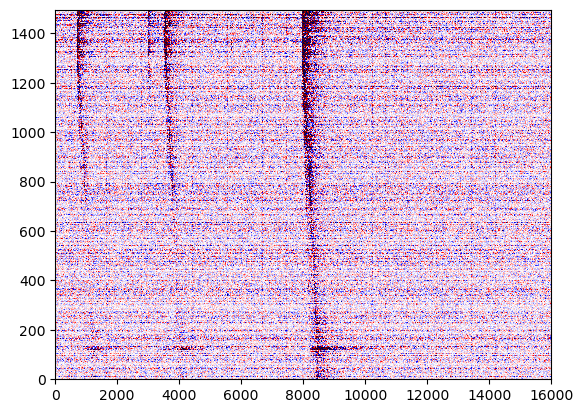

In [4]:
plt.figure()
vmax = np.percentile(np.abs(data), 99)
plt.pcolormesh(data, vmin=-vmax, vmax=vmax, cmap='seismic')


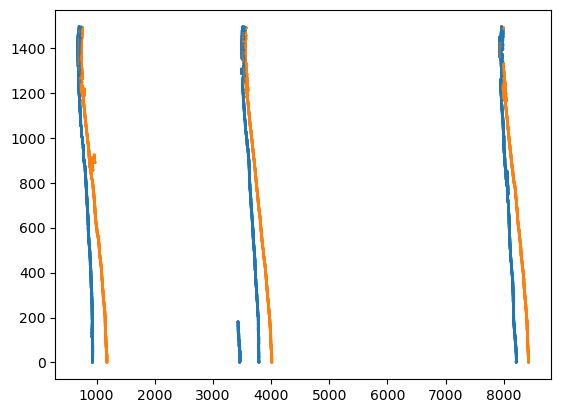

In [8]:
plt.figure()

color = lambda x: 'C0' if x == 'P' else 'C1'
plt.scatter(picks['phase_index'], picks['channel_index'], c=picks['phase_type'].map(color), s=1)

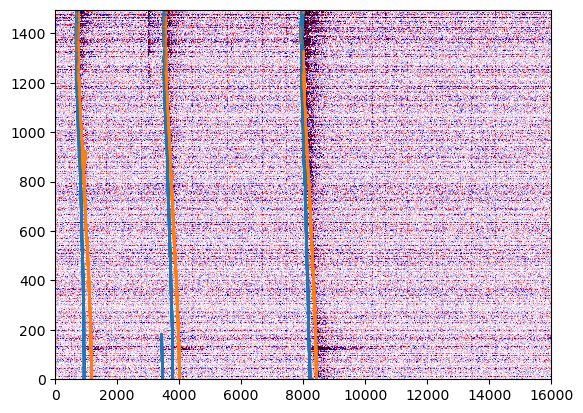

In [10]:
plt.figure()
vmax = np.percentile(np.abs(data), 99)
plt.pcolormesh(data, vmin=-vmax, vmax=vmax, cmap='seismic')

color = lambda x: 'C0' if x == 'P' else 'C1'
plt.scatter(picks['phase_index'], picks['channel_index'], c=picks['phase_type'].map(color), s=1)